In [28]:
import math
import numpy as np
import matplotlib.pyplot as plot
from PIL import Image

In [29]:
range_inc = lambda start, end: range(start, end+1)

In [30]:
def l_o_g(x, y, sigma):
    # Formatted this way for readability
    nom = ( (y**2)+(x**2)-2*(sigma**2) )
    denom = ( (2*math.pi*(sigma**6) ))
    expo = math.exp( -((x**2)+(y**2))/(2*(sigma**2)) )
    return nom*expo/denom

In [31]:
def create_log(sigma, size = 7):
    w = math.ceil(float(size)*float(sigma))
    
    # If the dimension is an even number, make it uneven
    if(w%2 == 0):
        w = w + 1

    # Now make the mask
    l_o_g_mask = []

    w_range = int(math.floor(w/2))
    for i in range_inc(-w_range, w_range):
        for j in range_inc(-w_range, w_range):
            l_o_g_mask.append(l_o_g(i,j,sigma))
    l_o_g_mask = np.array(l_o_g_mask)
    l_o_g_mask = l_o_g_mask.reshape(w,w)
    return l_o_g_mask

In [32]:
def convolve(image, mask):
    width = image.shape[1]
    height = image.shape[0]
    w_range = int(math.floor(mask.shape[0]/2))

    res_image = np.zeros((height, width))

    # Iterate over every pixel that can be covered by the mask
    for i in range(w_range,width-w_range):
        for j in range(w_range,height-w_range):
            # Then convolute with the mask 
            for k in range_inc(-w_range,w_range):
                for h in range_inc(-w_range,w_range):
                    res_image[j, i] += mask[w_range+h,w_range+k]*image[j+h,i+k]
    return res_image

In [33]:
def z_c_test(l_o_g_image):
    z_c_image = np.zeros(l_o_g_image.shape)

    # Check the sign (negative or positive) of all the pixels around each pixel
    for i in range(1,l_o_g_image.shape[0]-1):
        for j in range(1,l_o_g_image.shape[1]-1):
            neg_count = 0
            pos_count = 0
            for a in range_inc(-1, 1):
                for b in range_inc(-1,1):
                    if(a != 0 and b != 0):
                        if(l_o_g_image[i+a,j+b] < 0):
                            neg_count += 1
                        elif(l_o_g_image[i+a,j+b] > 0):
                            pos_count += 1

            # If all the signs around the pixel are the same and they're not all zero, then it's not a zero crossing and not an edge. 
            # Otherwise, copy it to the edge map.
            z_c = ( (neg_count > 0) and (pos_count > 0) )
            if(z_c):
                z_c_image[i,j] = 1

    return z_c_image

In [34]:
def run_l_o_g(bin_image, sigma_val, size_val):
    # Create the l_o_g mask
    l_o_g_mask = create_log(sigma_val, size_val)

    # Smooth the image by convolving with the LoG mask
    l_o_g_image = convolve(bin_image, l_o_g_mask)

    # Display the smoothed imgage
    #blurred = fig.add_subplot(1,4,2)
    #blurred.imshow(l_o_g_image, cmap=cm.gray)

    # Find the zero crossings
    z_c_image = z_c_test(l_o_g_image)

    #Display the zero crossings
    #edges = fig.add_subplot(1,4,3)
    #edges.imshow(z_c_image, cmap=cm.gray)
    #pylab.show()
    new_im = Image.fromarray(z_c_image)
    
    return new_im

In [35]:
def update(val):
    run_l_o_g(bin_image, sigma.val, int(size.val))

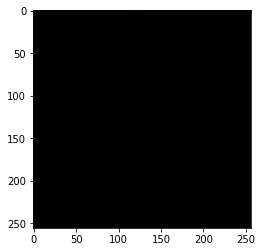

In [45]:
img = Image.open("cameraman.tif").convert("L")

np_im = np.array(img)

new_im = run_l_o_g(np_im, 1.2, 9)

plot.imshow(new_im)